# Data

In [7]:
import pandas as pd
import numpy as np

In [8]:
obj="oj287"

In [9]:
freq="gamma"
labelleft= "photons/cm^2/s"
instr = " FERMI "
data = pd.read_csv("data/"+obj+"_"+freq+"_web-lc.csv", sep=",", comment='#')
data.columns = ['obs', 'Flux']
data['Flux'] = data['Flux'].apply(pd.to_numeric, errors='coerce').fillna(0)
pd.set_option('display.max_rows', None)
data['Flux'].max()

5.797620337950963e-07

In [4]:
#data['Flux'] = data['Flux']
data.loc[:, 'norm'] = data['Flux']/data['Flux'].max()
data['norm'] = data['norm']*100 ###
data['norm'] = data['norm'].astype(int)
data['norm']

0         0
1         0
2        49
3        46
4        42
5        39
6        37
7        35
8        33
9        31
10       28
11       26
12       24
13       22
14       21
15       21
16       21
17       21
18       20
19       19
20       17
21       16
22       15
23       15
24       15
25       15
26       14
27       13
28       13
29       14
30       14
31       14
32       13
33       12
34       11
35       11
36       11
37       11
38       11
39       11
40       11
41       11
42       11
43       10
44        9
45        9
46        8
47        8
48        8
49        8
50        9
51        9
52       10
53       11
54       11
55       11
56       11
57       11
58       11
59       12
60       13
61       13
62       13
63       13
64       13
65       13
66       12
67       12
68       11
69       10
70       10
71       10
72       10
73       10
74        9
75       10
76       10
77       11
78       11
79       11
80       11
81       10
82       10
83  

# DATE TIME

In [5]:
import datetime
from miditime.miditime import MIDITime

In [6]:
#tempo 80 bpm, file, seconds/year, octave (5 is default C5), número de octaves per output
mymidi = MIDITime(80,"data/"+obj+"_"+freq+"_sonified.mid",7,3,4) 

In [127]:
#def clean(x):
#    year = int(x.split("-")[0])
#    month = int(x.split("-")[1])
#    day = int(x.split("-")[2])
#    x = datetime.datetime(year,month,day)
#   return x

In [7]:
data['norm'].dtypes

dtype('int64')

In [132]:
#my_data = data.to_dict('records')
#my_data

In [133]:
#data['obs'] = data['obs'].apply(clean)

In [134]:
#data['date']

In [135]:
#my_data = data.to_dict('records')
#my_data

In [136]:
#my_data_epoched = [
#    {
#        'days_since_epoch': mymidi.days_since_epoch(d['date']),
#        'Flux':d['Flux']
#    } for d in my_data
#]
#my_data_epoched

In [137]:
#my_data_timed = [
#    {
#        'beat': mymidi.beat(d['days_since_epoch']),
#        'Flux': d['Flux']
#    } for d in my_data_epoched
#]
#my_data_timed

In [138]:
#start_time = my_data_timed[0]['beat']
#start_time
#my_data.max()

In [50]:
def data_to_pitch_tuned(Flux):
    scale_pct = mymidi.linear_scale_pct(data['Flux'].min(),data['Flux'].max(),Flux) #O es el mínimo y 30 es el máximo escalado.
    
    d_minor = ['D','E','F','G','A','Bd','C'] 
    note = mymidi.scale_to_note(scale_pct, d_minor)
    #note = [
    #[0, 60, 127, 3],  #At 0 beats (the start), Middle C with velocity 127, for 3 beats 
    #[10, 61, 127, 4]]
    midi_pitch = mymidi.note_to_midi_pitch(note)
    #print(note)
    return midi_pitch

In [8]:
data['norm'].astype(int)

0         0
1         0
2        49
3        46
4        42
5        39
6        37
7        35
8        33
9        31
10       28
11       26
12       24
13       22
14       21
15       21
16       21
17       21
18       20
19       19
20       17
21       16
22       15
23       15
24       15
25       15
26       14
27       13
28       13
29       14
30       14
31       14
32       13
33       12
34       11
35       11
36       11
37       11
38       11
39       11
40       11
41       11
42       11
43       10
44        9
45        9
46        8
47        8
48        8
49        8
50        9
51        9
52       10
53       11
54       11
55       11
56       11
57       11
58       11
59       12
60       13
61       13
62       13
63       13
64       13
65       13
66       12
67       12
68       11
69       10
70       10
71       10
72       10
73       10
74        9
75       10
76       10
77       11
78       11
79       11
80       11
81       10
82       10
83  

In [9]:
scale_pct = mymidi.linear_scale_pct(data['norm'].min(),data['norm'].max(),50) #O es el mínimo y 30 es el máximo escalado.
d_minor = ['D','E','F','G','A','Bd','C'] 
note = mymidi.scale_to_note(scale_pct, d_minor)
midi_pitch = mymidi.note_to_midi_pitch(note)

midi_pitch = mymidi.note_to_midi_pitch(note)
    #print(note)
    return midi_pitch

#scale_pct.astype(int)
#scale_pct.dtype
#type(data['norm'])
#midi_pitch

IndentationError: unexpected indent (<ipython-input-9-ed4ef9798597>, line 8)

In [9]:
registros = data['norm']
registros.shape[0]

4457

In [11]:
registros = data['norm']

note_list = []
for i in range(registros.shape[0]):
    scale_pct = mymidi.linear_scale_pct(data['norm'].min(),data['norm'].max(),data['norm'].array[i]) #O es el mínimo y 30 es el máximo escalado.
    d_minor = ['D','E','F','G','A','Bd','C'] 
    note = mymidi.scale_to_note(scale_pct, d_minor)
    #note_list.append([note])
    
    midi_pitch = mymidi.note_to_midi_pitch(note)
    #print(note)
    #return midi_pitch
    #midi_pitch
    
    note_list.append([mymidi.beat(i),
    #    d['beat'] - start_time,
        midi_pitch,
        90, #velocidad
        2 #duracion in beats
    ])
    #print(scale_pct)
    
    
#scale_pct.astype(int)
#scale_pct.dtype
#type(data['norm'])
#note_list
#midi_pitch

In [12]:
#note_list = []
#for d in my_data_timed:
#    note_list.append([
#        d['beat'] - start_time,
#        data_to_pitch_tuned(d['Flux']),
#        90, #velocidad
#        2 #duracion in beats
#    ])
note_list

[[0.0, 38, 90, 2],
 [0.03, 38, 90, 2],
 [0.05, 60, 90, 2],
 [0.08, 57, 90, 2],
 [0.1, 55, 90, 2],
 [0.13, 53, 90, 2],
 [0.15, 53, 90, 2],
 [0.18, 53, 90, 2],
 [0.2, 52, 90, 2],
 [0.23, 52, 90, 2],
 [0.26, 50, 90, 2],
 [0.28, 48, 90, 2],
 [0.31, 48, 90, 2],
 [0.33, 48, 90, 2],
 [0.36, 45, 90, 2],
 [0.38, 45, 90, 2],
 [0.41, 45, 90, 2],
 [0.43, 45, 90, 2],
 [0.46, 45, 90, 2],
 [0.49, 45, 90, 2],
 [0.51, 43, 90, 2],
 [0.54, 43, 90, 2],
 [0.56, 43, 90, 2],
 [0.59, 43, 90, 2],
 [0.61, 43, 90, 2],
 [0.64, 43, 90, 2],
 [0.66, 43, 90, 2],
 [0.69, 41, 90, 2],
 [0.72, 41, 90, 2],
 [0.74, 43, 90, 2],
 [0.77, 43, 90, 2],
 [0.79, 43, 90, 2],
 [0.82, 41, 90, 2],
 [0.84, 41, 90, 2],
 [0.87, 41, 90, 2],
 [0.89, 41, 90, 2],
 [0.92, 41, 90, 2],
 [0.95, 41, 90, 2],
 [0.97, 41, 90, 2],
 [1.0, 41, 90, 2],
 [1.02, 41, 90, 2],
 [1.05, 41, 90, 2],
 [1.07, 41, 90, 2],
 [1.1, 41, 90, 2],
 [1.12, 41, 90, 2],
 [1.15, 41, 90, 2],
 [1.18, 40, 90, 2],
 [1.2, 40, 90, 2],
 [1.23, 40, 90, 2],
 [1.25, 40, 90, 2],
 [1.28

In [13]:
mymidi.add_track(note_list)
mymidi

In [14]:
mymidi.save_midi()

38 0.0 2 90
38 0.03 2 90
60 0.05 2 90
57 0.08 2 90
55 0.1 2 90
53 0.13 2 90
53 0.15 2 90
53 0.18 2 90
52 0.2 2 90
52 0.23 2 90
50 0.26 2 90
48 0.28 2 90
48 0.31 2 90
48 0.33 2 90
45 0.36 2 90
45 0.38 2 90
45 0.41 2 90
45 0.43 2 90
45 0.46 2 90
45 0.49 2 90
43 0.51 2 90
43 0.54 2 90
43 0.56 2 90
43 0.59 2 90
43 0.61 2 90
43 0.64 2 90
43 0.66 2 90
41 0.69 2 90
41 0.72 2 90
43 0.74 2 90
43 0.77 2 90
43 0.79 2 90
41 0.82 2 90
41 0.84 2 90
41 0.87 2 90
41 0.89 2 90
41 0.92 2 90
41 0.95 2 90
41 0.97 2 90
41 1.0 2 90
41 1.02 2 90
41 1.05 2 90
41 1.07 2 90
41 1.1 2 90
41 1.12 2 90
41 1.15 2 90
40 1.18 2 90
40 1.2 2 90
40 1.23 2 90
40 1.25 2 90
41 1.28 2 90
41 1.3 2 90
41 1.33 2 90
41 1.35 2 90
41 1.38 2 90
41 1.41 2 90
41 1.43 2 90
41 1.46 2 90
41 1.48 2 90
41 1.51 2 90
41 1.53 2 90
41 1.56 2 90
41 1.58 2 90
41 1.61 2 90
41 1.64 2 90
41 1.66 2 90
41 1.69 2 90
41 1.71 2 90
41 1.74 2 90
41 1.76 2 90
41 1.79 2 90
41 1.81 2 90
41 1.84 2 90
41 1.87 2 90
41 1.89 2 90
41 1.92 2 90
41 1.94 2 90
41 1.9

40 18.3 2 90
40 18.32 2 90
40 18.35 2 90
40 18.37 2 90
40 18.4 2 90
40 18.42 2 90
41 18.45 2 90
41 18.48 2 90
41 18.5 2 90
43 18.53 2 90
43 18.55 2 90
43 18.58 2 90
45 18.6 2 90
45 18.63 2 90
45 18.65 2 90
48 18.68 2 90
48 18.7 2 90
48 18.73 2 90
48 18.76 2 90
48 18.78 2 90
48 18.81 2 90
45 18.83 2 90
45 18.86 2 90
45 18.88 2 90
43 18.91 2 90
43 18.93 2 90
43 18.96 2 90
43 18.99 2 90
43 19.01 2 90
43 19.04 2 90
43 19.06 2 90
43 19.09 2 90
43 19.11 2 90
43 19.14 2 90
43 19.16 2 90
43 19.19 2 90
43 19.22 2 90
43 19.24 2 90
43 19.27 2 90
43 19.29 2 90
43 19.32 2 90
43 19.34 2 90
43 19.37 2 90
45 19.39 2 90
45 19.42 2 90
45 19.45 2 90
45 19.47 2 90
45 19.5 2 90
45 19.52 2 90
45 19.55 2 90
45 19.57 2 90
43 19.6 2 90
43 19.62 2 90
43 19.65 2 90
43 19.68 2 90
43 19.7 2 90
41 19.73 2 90
41 19.75 2 90
41 19.78 2 90
41 19.8 2 90
41 19.83 2 90
41 19.85 2 90
41 19.88 2 90
41 19.91 2 90
41 19.93 2 90
41 19.96 2 90
41 19.98 2 90
41 20.01 2 90
40 20.03 2 90
40 20.06 2 90
41 20.08 2 90
41 20.11 2 90
4

50 35.9 2 90
50 35.93 2 90
50 35.95 2 90
50 35.98 2 90
50 36.0 2 90
50 36.03 2 90
50 36.06 2 90
52 36.08 2 90
52 36.11 2 90
53 36.13 2 90
53 36.16 2 90
52 36.18 2 90
52 36.21 2 90
52 36.23 2 90
52 36.26 2 90
52 36.29 2 90
52 36.31 2 90
52 36.34 2 90
52 36.36 2 90
50 36.39 2 90
50 36.41 2 90
48 36.44 2 90
48 36.46 2 90
48 36.49 2 90
48 36.52 2 90
45 36.54 2 90
45 36.57 2 90
45 36.59 2 90
45 36.62 2 90
45 36.64 2 90
45 36.67 2 90
45 36.69 2 90
45 36.72 2 90
45 36.75 2 90
45 36.77 2 90
45 36.8 2 90
45 36.82 2 90
43 36.85 2 90
43 36.87 2 90
45 36.9 2 90
45 36.92 2 90
45 36.95 2 90
43 36.98 2 90
43 37.0 2 90
45 37.03 2 90
45 37.05 2 90
45 37.08 2 90
45 37.1 2 90
43 37.13 2 90
43 37.15 2 90
43 37.18 2 90
43 37.21 2 90
43 37.23 2 90
43 37.26 2 90
43 37.28 2 90
43 37.31 2 90
43 37.33 2 90
43 37.36 2 90
45 37.38 2 90
45 37.41 2 90
45 37.44 2 90
43 37.46 2 90
43 37.49 2 90
43 37.51 2 90
43 37.54 2 90
43 37.56 2 90
41 37.59 2 90
41 37.61 2 90
41 37.64 2 90
41 37.67 2 90
41 37.69 2 90
41 37.72 2 9

45 54.05 2 90
45 54.07 2 90
43 54.1 2 90
43 54.12 2 90
43 54.15 2 90
43 54.17 2 90
43 54.2 2 90
43 54.22 2 90
41 54.25 2 90
41 54.28 2 90
41 54.3 2 90
41 54.33 2 90
41 54.35 2 90
41 54.38 2 90
41 54.4 2 90
41 54.43 2 90
41 54.45 2 90
43 54.48 2 90
43 54.51 2 90
43 54.53 2 90
43 54.56 2 90
45 54.58 2 90
45 54.61 2 90
45 54.63 2 90
45 54.66 2 90
45 54.68 2 90
45 54.71 2 90
45 54.74 2 90
45 54.76 2 90
45 54.79 2 90
45 54.81 2 90
45 54.84 2 90
43 54.86 2 90
43 54.89 2 90
43 54.91 2 90
43 54.94 2 90
43 54.97 2 90
41 54.99 2 90
41 55.02 2 90
41 55.04 2 90
41 55.07 2 90
41 55.09 2 90
40 55.12 2 90
40 55.14 2 90
40 55.17 2 90
40 55.2 2 90
40 55.22 2 90
40 55.25 2 90
40 55.27 2 90
40 55.3 2 90
40 55.32 2 90
40 55.35 2 90
40 55.37 2 90
40 55.4 2 90
40 55.43 2 90
40 55.45 2 90
40 55.48 2 90
40 55.5 2 90
40 55.53 2 90
40 55.55 2 90
40 55.58 2 90
40 55.6 2 90
40 55.63 2 90
40 55.66 2 90
40 55.68 2 90
40 55.71 2 90
41 55.73 2 90
41 55.76 2 90
43 55.78 2 90
43 55.81 2 90
43 55.83 2 90
45 55.86 2 90
4

40 73.41 2 90
40 73.44 2 90
40 73.47 2 90
40 73.49 2 90
40 73.52 2 90
40 73.54 2 90
40 73.57 2 90
41 73.59 2 90
41 73.62 2 90
43 73.64 2 90
43 73.67 2 90
43 73.7 2 90
43 73.72 2 90
43 73.75 2 90
43 73.77 2 90
43 73.8 2 90
43 73.82 2 90
43 73.85 2 90
41 73.87 2 90
41 73.9 2 90
41 73.93 2 90
41 73.95 2 90
41 73.98 2 90
41 74.0 2 90
41 74.03 2 90
43 74.05 2 90
43 74.08 2 90
43 74.1 2 90
43 74.13 2 90
43 74.16 2 90
43 74.18 2 90
41 74.21 2 90
41 74.23 2 90
41 74.26 2 90
41 74.28 2 90
41 74.31 2 90
41 74.33 2 90
41 74.36 2 90
43 74.39 2 90
43 74.41 2 90
43 74.44 2 90
45 74.46 2 90
45 74.49 2 90
45 74.51 2 90
45 74.54 2 90
45 74.56 2 90
45 74.59 2 90
48 74.62 2 90
48 74.64 2 90
48 74.67 2 90
48 74.69 2 90
50 74.72 2 90
50 74.74 2 90
50 74.77 2 90
50 74.79 2 90
50 74.82 2 90
50 74.85 2 90
48 74.87 2 90
48 74.9 2 90
48 74.92 2 90
45 74.95 2 90
45 74.97 2 90
45 75.0 2 90
43 75.02 2 90
43 75.05 2 90
43 75.08 2 90
43 75.1 2 90
41 75.13 2 90
41 75.15 2 90
41 75.18 2 90
41 75.2 2 90
41 75.23 2 90
4

41 92.43 2 90
43 92.45 2 90
43 92.48 2 90
45 92.5 2 90
45 92.53 2 90
48 92.55 2 90
48 92.58 2 90
52 92.61 2 90
57 92.63 2 90
64 92.66 2 90
67 92.68 2 90
67 92.71 2 90
67 92.73 2 90
65 92.76 2 90
64 92.78 2 90
62 92.81 2 90
60 92.84 2 90
60 92.86 2 90
57 92.89 2 90
55 92.91 2 90
55 92.94 2 90
55 92.96 2 90
55 92.99 2 90
53 93.01 2 90
53 93.04 2 90
53 93.07 2 90
53 93.09 2 90
53 93.12 2 90
52 93.14 2 90
52 93.17 2 90
52 93.19 2 90
50 93.22 2 90
50 93.24 2 90
50 93.27 2 90
48 93.3 2 90
48 93.32 2 90
48 93.35 2 90
48 93.37 2 90
48 93.4 2 90
45 93.42 2 90
45 93.45 2 90
48 93.47 2 90
45 93.5 2 90
45 93.52 2 90
45 93.55 2 90
45 93.58 2 90
43 93.6 2 90
43 93.63 2 90
43 93.65 2 90
43 93.68 2 90
43 93.7 2 90
43 93.73 2 90
45 93.75 2 90
45 93.78 2 90
45 93.81 2 90
45 93.83 2 90
45 93.86 2 90
45 93.88 2 90
45 93.91 2 90
45 93.93 2 90
45 93.96 2 90
45 93.98 2 90
43 94.01 2 90
43 94.04 2 90
43 94.06 2 90
43 94.09 2 90
45 94.11 2 90
45 94.14 2 90
48 94.16 2 90
50 94.19 2 90
52 94.21 2 90
52 94.24 2 9

40 110.54 2 90
38 110.57 2 90
38 110.59 2 90
38 110.62 2 90
38 110.65 2 90
38 110.67 2 90
38 110.7 2 90
38 110.72 2 90
38 110.75 2 90
38 110.77 2 90
38 110.8 2 90
38 110.82 2 90
38 110.85 2 90
38 110.88 2 90
38 110.9 2 90
38 110.93 2 90
38 110.95 2 90
38 110.98 2 90
38 111.0 2 90
38 111.03 2 90
38 111.05 2 90
38 111.08 2 90
38 111.11 2 90
38 111.13 2 90
38 111.16 2 90
38 111.18 2 90
38 111.21 2 90
38 111.23 2 90
38 111.26 2 90
38 111.28 2 90
38 111.31 2 90
38 111.34 2 90
38 111.36 2 90
38 111.39 2 90
38 111.41 2 90
38 111.44 2 90
38 111.46 2 90
38 111.49 2 90
38 111.51 2 90
38 111.54 2 90
38 111.57 2 90
38 111.59 2 90
38 111.62 2 90
38 111.64 2 90
38 111.67 2 90
38 111.69 2 90
38 111.72 2 90
38 111.74 2 90
38 111.77 2 90
38 111.8 2 90
38 111.82 2 90
38 111.85 2 90
38 111.87 2 90
38 111.9 2 90
38 111.92 2 90
38 111.95 2 90
38 111.97 2 90
38 112.0 2 90
38 112.03 2 90
38 112.05 2 90
38 112.08 2 90
38 112.1 2 90
38 112.13 2 90
38 112.15 2 90
38 112.18 2 90
38 112.2 2 90
38 112.23 2 90
38 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.cm as cm
from matplotlib import colors as c
from matplotlib.pylab import rcParams

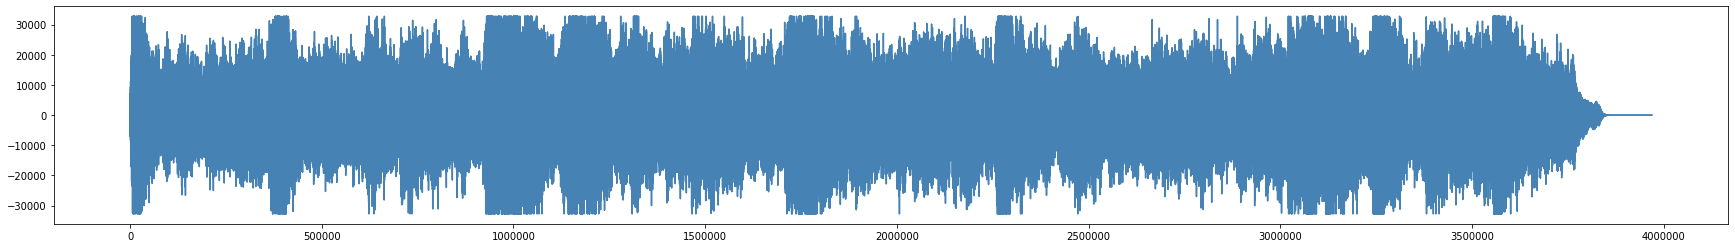

<Figure size 432x288 with 0 Axes>

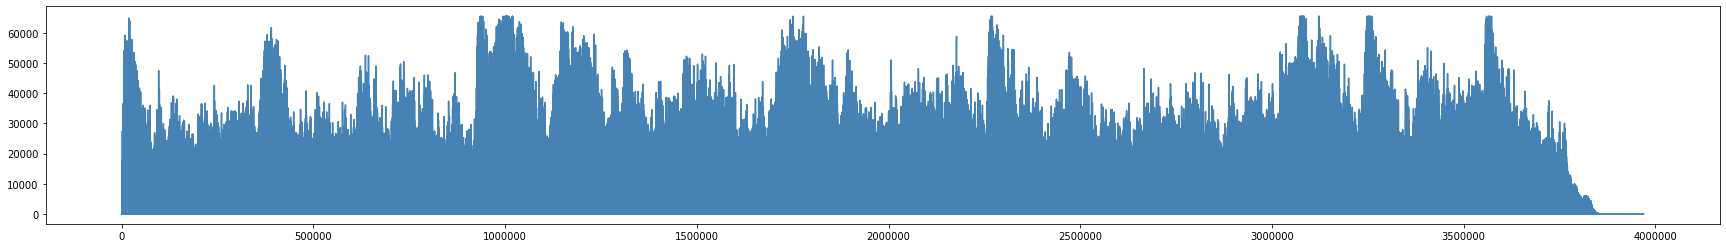

<Figure size 432x288 with 0 Axes>

In [16]:
def plot(data):
    plt.figure(figsize=(30, 4))
    plt.plot(data, color='steelblue')
    plt.figure()
    plt.show()

#rate, wav_data = wavfile.read("audio_self/on/on.wav")
rate, wav_data = wavfile.read("../../../lmms/oj287_gamma.wav")

plot(wav_data)
plot(np.abs(np.fft.fft(wav_data)))

In [10]:
sample_rate, samples = wavfile.read("../../../lmms/oj287_gamma_mono.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)


/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


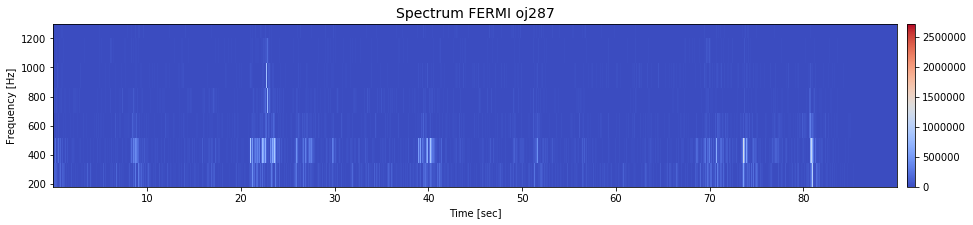

In [13]:
#plt.pcolormesh(times, frequencies, spectrogram)
#plt.figure(figsize=(30, 14))
rcParams['figure.figsize'] = 18, 3
colours = ("blue", "green", "red")
cmap = c.ListedColormap(colours)
plt.pcolormesh(times, frequencies, spectrogram, cmap='coolwarm')

plt.title('Spectrum'+instr+obj, fontsize=14)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([times.min(),times.max(),180, 1300])
plt.colorbar(pad=0.01)
plt.savefig("../../../lmms/images/"+obj+"_"+freq+"_spectrum.png", format="png", dpi=300)
plt.show()

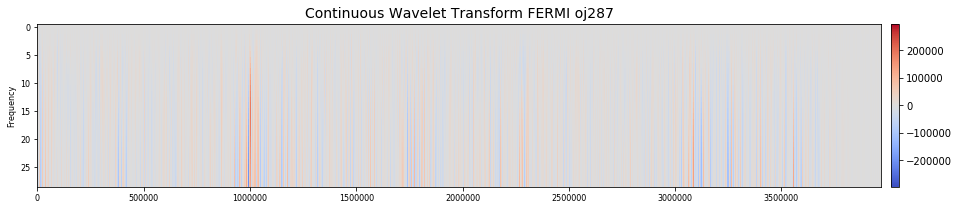

In [14]:
from scipy import signal
rcParams['figure.figsize'] = 18, 3
plt.subplot(111)
widths = np.arange(1,30)
cwtmatr = signal.cwt(samples, signal.ricker, widths)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.title('Continuous Wavelet Transform'+instr+obj, fontsize=14)
plt.imshow(cwtmatr, aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max(), cmap='coolwarm')
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=8)
plt.savefig("../../../lmms/images/"+obj+"_"+freq+"_wavelets.png", format="png", dpi=300)

In [21]:
!pwd

/home/wattie/oj287_lc/freq/gamma/midi
